In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('amazon.csv',encoding="iso-8859-1",parse_dates=['date'])
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

## 1. Display Top 5 Rows of The Dataset

In [3]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## 2. Check Last 5 Rows

In [4]:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


## 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 6454
Number of Columns: 5


## 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## 5. Check For Duplicate Data and Drop Them

In [7]:
print("Is there Duplicated Data:",data.duplicated().any())

Is there Duplicated Data: True


In [8]:
data.duplicated().sum()

32

In [9]:
data=data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

## 6. Check Null Values In The Dataset

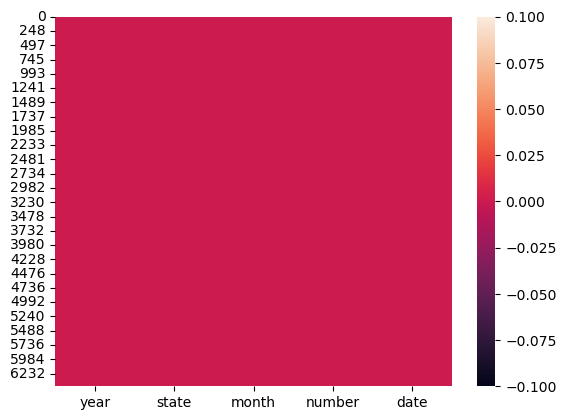

In [11]:
sns.heatmap(data.isnull());

## 7. Get Overall Statistics About The Dataframe

In [12]:
data.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


## 8. Rename Month Names To English

In [13]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [14]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [15]:
data['new_month']=data['month'].map({'Janeiro':'Jan',
                                     'Fevereiro':'Feb',
                                     'Março':'March',
                                     'Abril':'April',
                                     'Maio':'May',
                                     'Junho':'Juny',
                                     'Julho':'July',
                                     'Agosto':'Aug',
                                     'Setembro':'Sept',
                                     'Outubro':'Oct',
                                     'Novembro':'Nov',
                                     'Dezembro':'Dec'})

## 9. Total Number of Fires Registered

In [16]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [17]:
data.shape

(6422, 6)

## 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [18]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [19]:
data1 = data.groupby('new_month')['number'].sum().reset_index()
data1

,new_month,number
0,April,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,July,92319.113
6,Juny,55997.675
7,March,30709.405
8,May,34725.363
9,Nov,85508.054


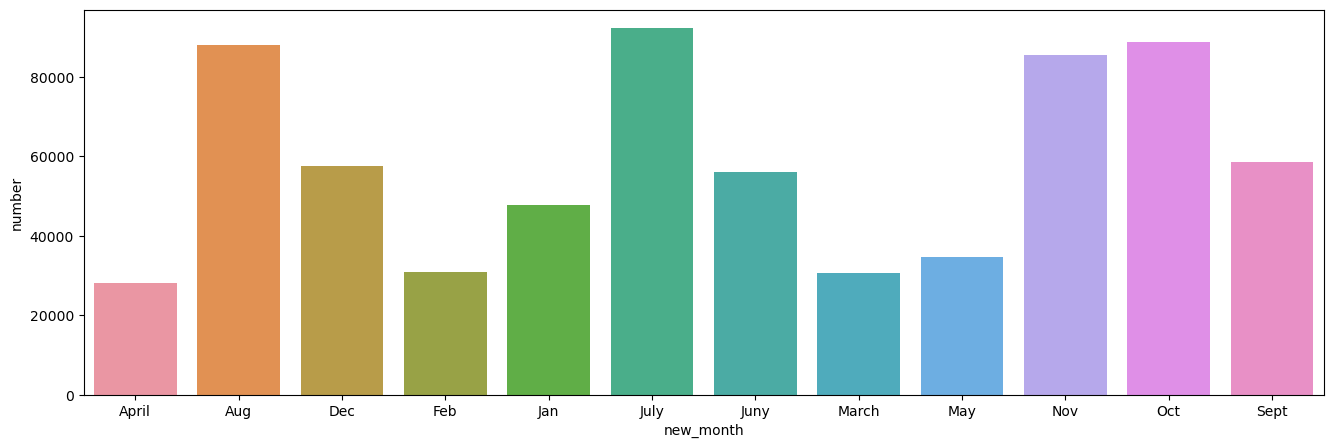

In [20]:
plt.figure(figsize=(16,5))
sns.barplot(x='new_month',y='number',data=data1)
plt.show();

`from the table we know that the forest fire have a maximum value in july`

## 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [21]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [54]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2.head(5)

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600


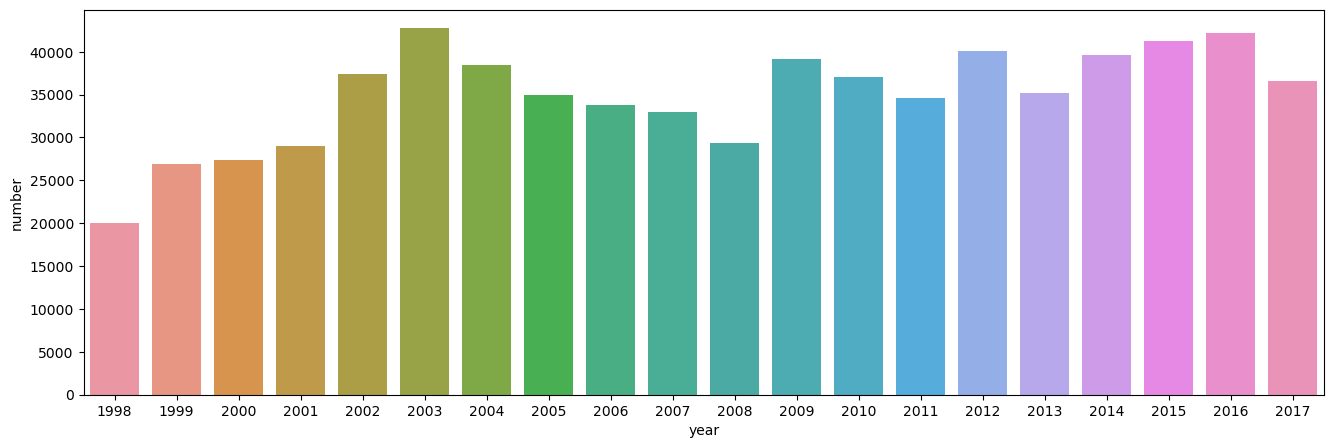

In [55]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data2)
plt.show()

`from the table we know that the forest fire have a maximum value in 2003`

## 12. In Which State Maximum Number of Forest Fires Was Reported?

In [24]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [25]:
data3 = data.groupby('state')['number'].sum().reset_index()
data3.head(5)

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226


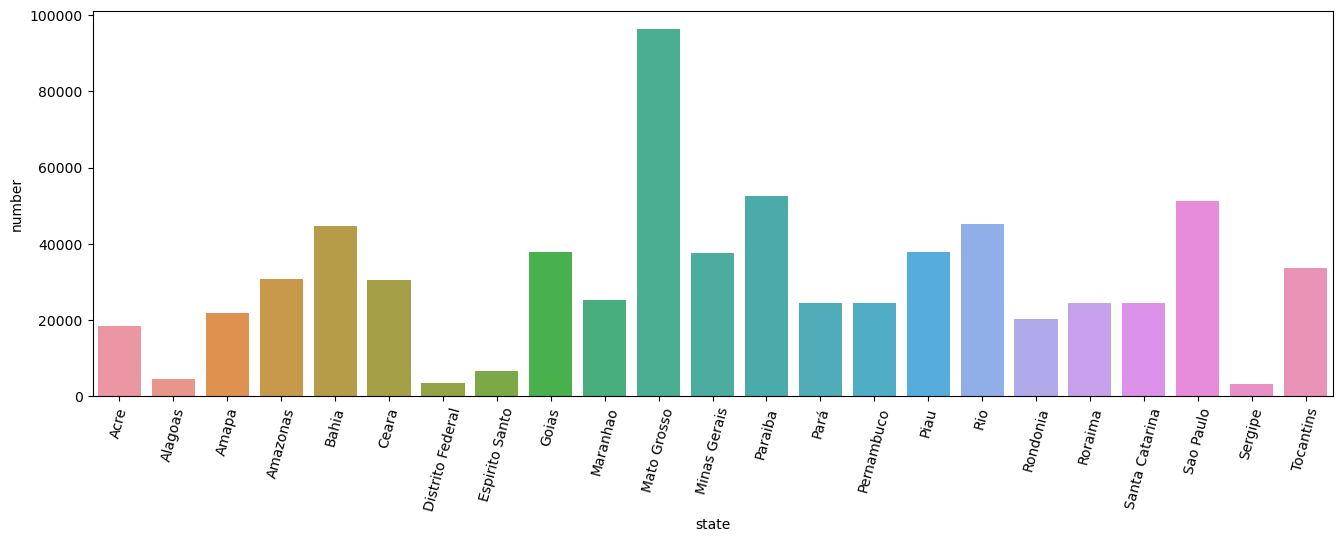

In [26]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data3)
plt.xticks(rotation=75)
plt.show()

`from the table we know that the forest fire have a maximum report in matto grosso state`

## 13. Find Total Number of Fires Were Reported In Amazonas

In [27]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [28]:
data['state'].str.contains('Amazonas',case=False).sum()

239

In [29]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

## 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [30]:
from collections import Counter

In [31]:
data4=data[data['state']=="Amazonas"]

In [32]:
data5=data4.groupby('year')['number'].sum().reset_index()
data5.head()

,year,number
0,1998,946.0
1,1999,1061.0
2,2000,853.0
3,2001,1297.0
4,2002,2852.0


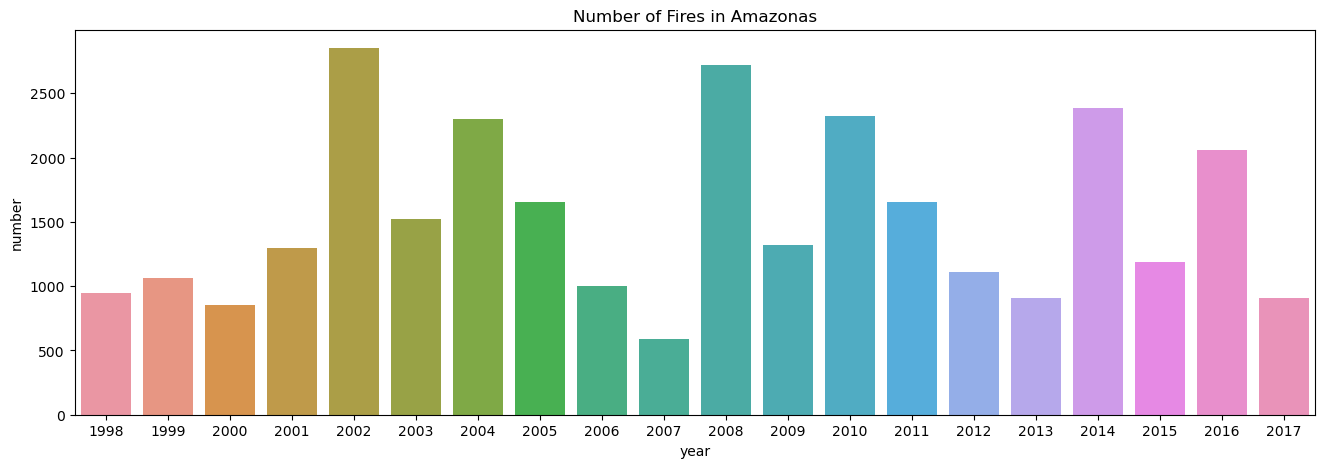

In [33]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data5)
plt.title('Number of Fires in Amazonas')
plt.show()

## 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [34]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [37]:
day=data6.groupby(data6['date'].dt.dayofweek).sum().number
#.number for count all of the day by day of week

import calendar

day.index = [calendar.day_name[x] for x in range(0,7)]
day=day.reset_index()

In [38]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


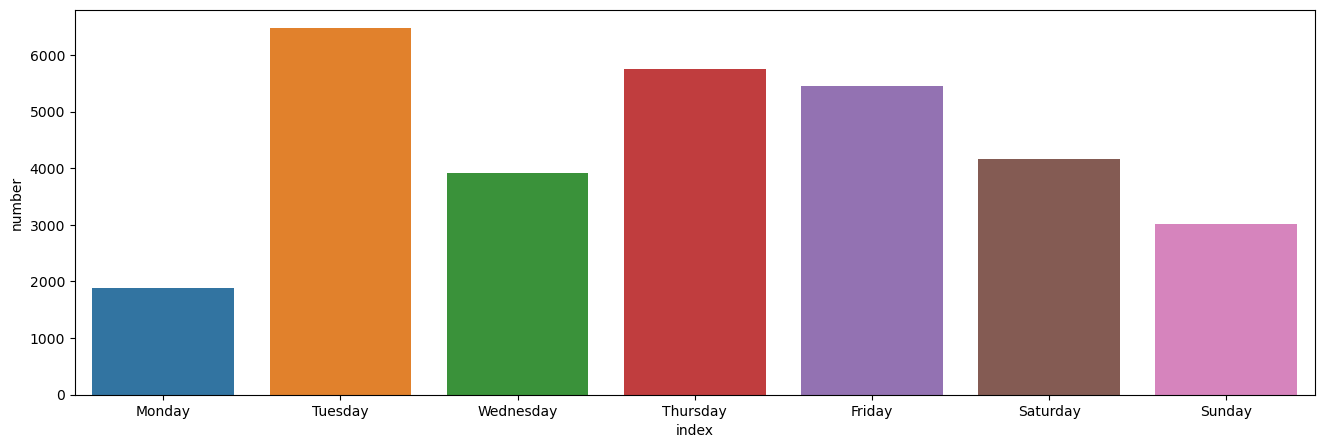

In [39]:
plt.figure(figsize=(16,5))
sns.barplot(x="index",y="number",data=day);

## 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [40]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [41]:
data7=data[data['year']==2015]

In [42]:
data8=data7.groupby('new_month')['number'].sum().reset_index()
data8

,new_month,number
0,April,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,July,4364.392
6,Juny,3260.552
7,March,2202.000
8,May,2384.000
9,Nov,4034.518


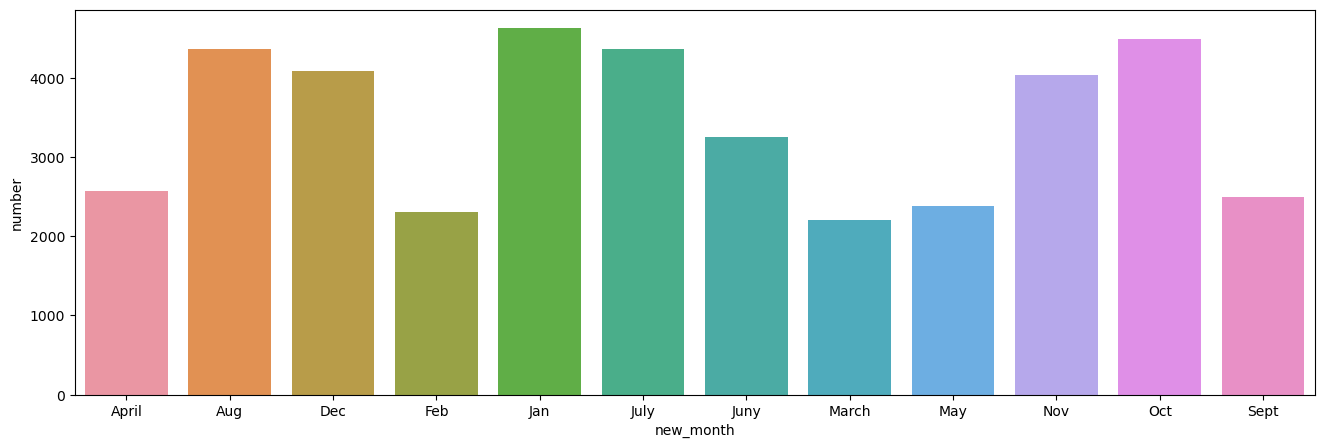

In [43]:
plt.figure(figsize=(16,5))
sns.barplot(x="new_month",y="number",data=data8);

In [44]:
#alternative method
fire=data[data['year']==2015].groupby('new_month')['number'].sum().reset_index()

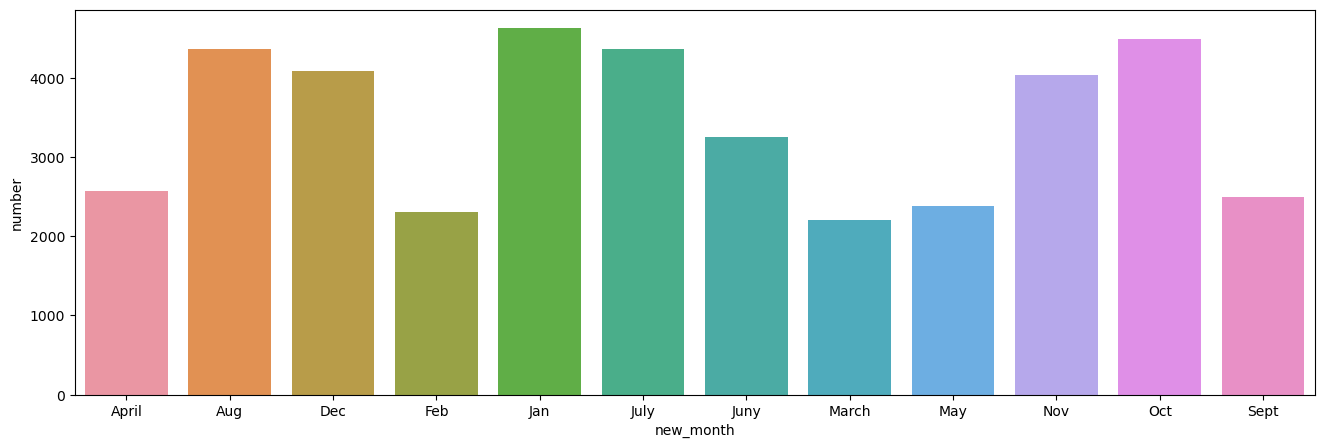

In [45]:
plt.figure(figsize=(16,5))
sns.barplot(x="new_month",y="number",data=fire);

## 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [46]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [47]:
data8=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [48]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


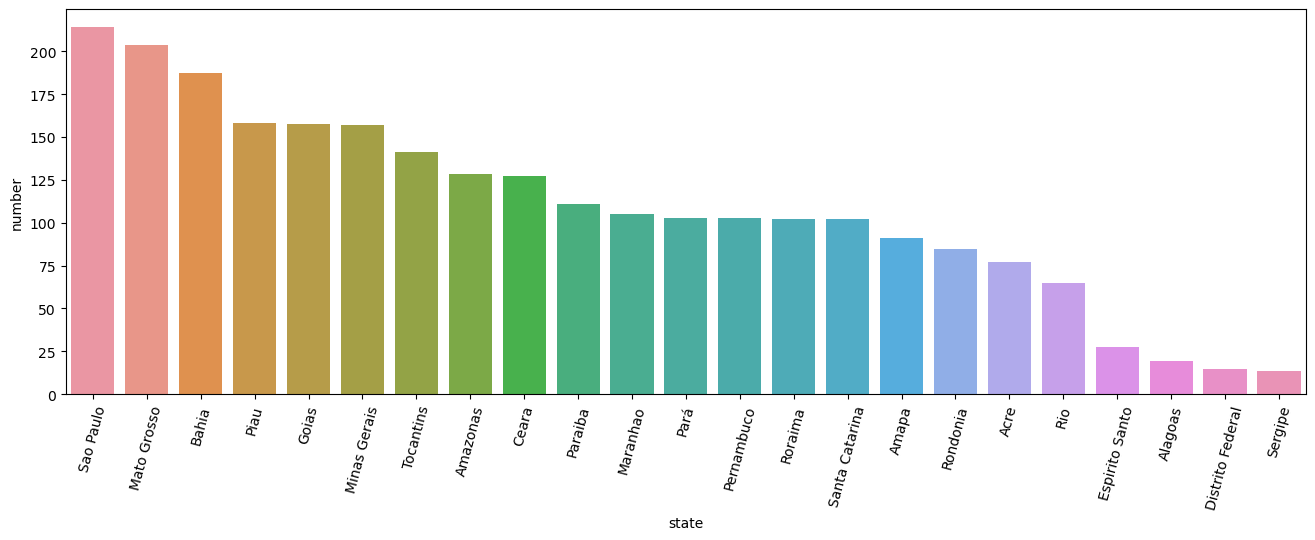

In [49]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data8)
plt.xticks(rotation=75)
plt.show()

## 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [50]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [51]:
data[data['new_month']=='Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)